
LETTERS
Train:  (124800, 28, 28)
Test:  (20800, 28, 28)
Train labels:  (20800,)
Test labels:  (124800,)
Epoch 1/15
7800/7800 [==============================] - 51s 2ms/step - loss: 0.5174 - accuracy: 0.8373 - val_loss: 0.2391 - val_accuracy: 0.9199
Epoch 2/15
7800/7800 [==============================] - 15s 2ms/step - loss: 0.2942 - accuracy: 0.9047 - val_loss: 0.2208 - val_accuracy: 0.9267
Epoch 3/15
7800/7800 [==============================] - 15s 2ms/step - loss: 0.2510 - accuracy: 0.9181 - val_loss: 0.1997 - val_accuracy: 0.9338
Epoch 4/15
7800/7800 [==============================] - 15s 2ms/step - loss: 0.2262 - accuracy: 0.9252 - val_loss: 0.2037 - val_accuracy: 0.9333
Epoch 5/15
7800/7800 [==============================] - 15s 2ms/step - loss: 0.2112 - accuracy: 0.9291 - val_loss: 0.2049 - val_accuracy: 0.9345
Epoch 6/15
7800/7800 [==============================] - 16s 2ms/step - loss: 0.1988 - accuracy: 0.9326 - val_loss: 0.2057 - val_accuracy: 0.9367
Epoch 7/15
7800/7800 [===

c:\Users\rkbij\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


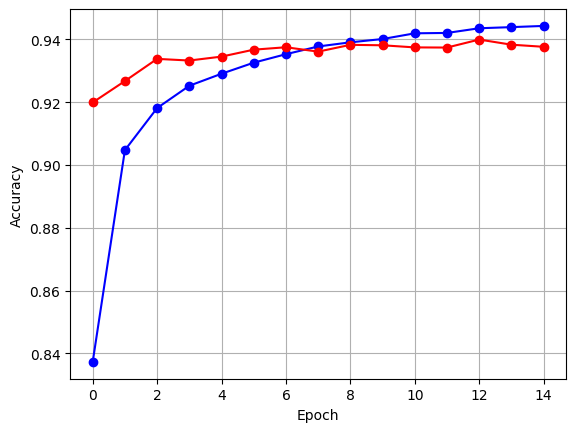

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from emnist import extract_training_samples, extract_test_samples
tf.get_logger().setLevel('ERROR')

FILTER_SIZE = 3
NUM_FILTERS = 32
INPUT_SIZE = 28
MAXPOOL_SIZE = 2
BATCH_SIZE = 16
NUMBER_OF_CLASSES = 27
EPOCHS = 15

train_letters, train_letters_labels = extract_training_samples('letters')
test_letters, test_letters_labels = extract_test_samples('letters')

print("LETTERS")
print('Train: ', train_letters.shape)
print('Test: ',test_letters.shape)
print('Train labels: ',test_letters_labels.shape)
print('Test labels: ',train_letters_labels.shape)

train_letters = train_letters / 255.0
test_letters = test_letters / 255.0

train_letters_labels = to_categorical(train_letters_labels, num_classes=NUMBER_OF_CLASSES)
test_letters_labels = to_categorical(test_letters_labels, num_classes=NUMBER_OF_CLASSES)

train_letters_labels = train_letters_labels[:,1:]
test_letters_labels = test_letters_labels[:,1:]

model = Sequential()
model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
                input_shape=(INPUT_SIZE, INPUT_SIZE, 3),
                activation='relu'))

model.add(MaxPooling2D(pool_size=(MAXPOOL_SIZE, MAXPOOL_SIZE)))

model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
                input_shape=(INPUT_SIZE, INPUT_SIZE, 3),
                activation='relu'))

model.add(MaxPooling2D(pool_size=(MAXPOOL_SIZE, MAXPOOL_SIZE)))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUMBER_OF_CLASSES-1, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

train_letters = np.expand_dims(train_letters, axis=-1)
test_letters = np.expand_dims(test_letters, axis=-1)

train_letters = np.repeat(train_letters, 3, axis=-1)
test_letters = np.repeat(test_letters, 3, axis=-1)

train_letters = np.array([cv2.resize(image, (INPUT_SIZE, INPUT_SIZE)) for image in train_letters])
test_letters = np.array([cv2.resize(image, (INPUT_SIZE, INPUT_SIZE)) for image in test_letters])

history = model.fit(train_letters, train_letters_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_letters, test_letters_labels))

x = range(EPOCHS)
plt.grid(True)
plt.plot(x, history.history['accuracy'], 'bo-', label='Training accuracy')
plt.plot(x, history.history['val_accuracy'], 'ro-', label='Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

model.save('./model/letters.h5')

HANDWRITTEN LETTER RECOGNITION

In [2]:
import os
import numpy as np
import tensorflow as tf
from process_image import preprocess_image
from sklearn.metrics import accuracy_score

INPUT_SIZE = 28

combined_model = tf.keras.models.load_model('./model/letters.h5')
message = list('MAKSYMKLISHOVITPM')
data_path = './data/letters'
image_path = os.listdir(data_path)
indexes = [int(indx.replace('.jpg','')) for indx in image_path]
indexes.sort()
symbols = []

for idx in indexes:
    symbols.append(preprocess_image(data_path+'/'+str(idx)+'.jpg', INPUT_SIZE))

written_text = []
for letter in symbols:
    predictions = combined_model.predict(letter)
    predicted_class_index = np.argmax(predictions[0])
    recognized_character = chr(ord('A') + predicted_class_index)
    written_text.append(recognized_character)

print(f"\nAccuracy: {accuracy_score(message, written_text)* 100:.2f}%")
print("Recognized characters:", ' '.join(written_text))
print('Desired characters:   ', ' '.join(message))

1/1 [==============================] - 0s 13ms/step

Accuracy: 88.24%
Recognized characters: M A K S Y M K L I J H O V J T P M
Desired characters:    M A K S Y M K L I S H O V I T P M
